# Contents List

01. Import libraries and data
02. Create customer profile variable
    Profile descriptions
03. Analyze profile distribution
    a. Customers per profile
        Observations
    b. Orders per profile
    c. Products per profile
        Observations
04. Compare customer profiles
    a. Summary statistics
        Observations
    b. Items purchased per department
        Observations
    c. Customer loyalty
        Observations
05. Visualize customer profiles
    a. Profile distribution bar graph
    b. Order day histograms
        Observations
    c. Order time histograms
        Observations
06. Export dataframe

# 01. Import libraries and data

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# create shortcut for data imports
path = r'C:\Users\jacym\Desktop\Career Foundry projects\04-2023 Instacart basket analysis'

In [3]:
# import merged data
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared data', 'orders_products_merged_grouped.pkl'))

# 02. Create customer profile variable

Using exclusively the real Instacart data, I'm creating a profile based on the time of day customers tend to shop. The profile includes four groups: Morning shoppers, who tend to shop between 6 and noon, afternoon shopper, who tend to shop between noon and 5 p.m., evening shoppers, who tend to shop between 5 p.m. and midnight, and overnight shoppers, who tend to shop between midnight and 6 a.m.

In [4]:
# create a new column called hour_mean. For its contents, group by user_id and calculate the average order_hour_of_day for each user
df['hour_mean'] = df.groupby(['user_id'])['order_hour_of_day'].transform(np.mean)

In [5]:
# check work
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,order_frequency,frequency_flag,hour_mean
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regular day,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,10.542373
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Slow day,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,10.542373
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Slow day,Most orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,10.542373
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Slow day,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,10.542373
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Slow day,Most orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,10.542373


In [6]:
# locate values in the hour_mean column between 6 and 12 and label them 'morning shopper' in the new time_flag column
df.loc[(df['hour_mean'] >= 6) & (df['hour_mean'] < 12), 'time_flag'] = 'Morning shopper'

In [7]:
# locate values in the hour_mean column between 12 and 17 and label them 'afternoon shopper' in the new time_flag column
df.loc[(df['hour_mean'] >= 12 ) & (df['hour_mean'] < 17), 'time_flag'] = 'Afternoon shopper'

In [8]:
# locate values in the hour_mean column between 0 and 6 and label them 'overnight shopper' in the new time_flag column
df.loc[(df['hour_mean'] >= 0) & (df['hour_mean'] < 6), 'time_flag'] = 'Overnight shopper'

In [9]:
# locate values in the hour_mean column between 17 and 23 and label them 'evening shopper' in the new time_flag column
df.loc[(df['hour_mean'] >= 17) & (df['hour_mean'] <= 23), 'time_flag'] = 'Evening shopper'

# 03. Analyze profile distribution

a. Customers per profile

In [13]:
# to count customers per group- group data by time_flag column, including any blanks, and count unique user_ids in each group
df.groupby(['time_flag'], dropna = False).agg({'user_id': ['nunique']})

,user_id
,nunique
time_flag,
Afternoon shopper,145514
Evening shopper,12480
Morning shopper,47867
Overnight shopper,348


Observations: The largest group of customers (71%) tend to shop in the afternoon, followed by the morning (23%), evening (6%) and overnight (.17%). The overnight group is quite small, so it may not be worth the effort to tailor promotional offers for this group.

In [ ]:
b. Orders per profile

In [12]:
# to count orders per group- group data by time_flag column, including any blanks, and count unique order_ids in each group
df.groupby(['time_flag'], dropna = False).agg({'order_id': ['nunique']})

,order_id
,nunique
time_flag,
Afternoon shopper,2397882
Evening shopper,99552
Morning shopper,715314
Overnight shopper,1937


In [ ]:
c. Products per profile

In [14]:
# to count total products per group- group data by time_flag column, including any blanks, and count product_ids in each group
df.groupby(['time_flag'], dropna = False).agg({'product_id': ['count']})

,product_id
,count
time_flag,
Afternoon shopper,24437712
Evening shopper,996312
Morning shopper,6952363
Overnight shopper,18472


Observations: Afternoon shoppers are the largest group, tend to have more orders and purchase more items per order on average, followed by morning shoppers -- except for the items per order metric, where evening shoppers rank second. Evening and overnight shoppers have fewer orders.  Overnight shoppers have the feest orders and purchase the fewest items per order.

# 04. Compare customer profiles

a. Summary statistics

In [16]:
# aggregate summary statistics for each profile group
df.groupby('time_flag').agg({'max_order': ['mean'], 'order_day_of_week': ['mean'], 'add_to_cart_order': ['mean'], 'order_frequency': ['mean']})

,max_order,order_day_of_week,add_to_cart_order,order_frequency
,mean,mean,mean,mean
time_flag,,,,
Afternoon shopper,33.575616,2.748772,8.325459,10.270266
Evening shopper,17.791792,2.753471,8.365305,14.495648
Morning shopper,33.454604,2.700902,8.445342,10.245148
Overnight shopper,12.173398,3.136639,8.574654,15.481188


Observations: Afternoon shoppers and morning shoppers have a longer order history and order more frequently than evening and overnight shoppers. Evening shoppers shop less frequently and have shorter order histories. Overnight shoppers have the lowest order frequency and shortest order histories, but they tend to order more items per trip.

b. Items purchased per department

In [19]:
# view items purchased per department for each profile group
df.groupby(['time_flag', 'department_id']).agg({'department_id': ['count']})

department_id
                                        count
time_flag         department_id              
Afternoon shopper 1                   1725003
                  2                     27328
                  3                    887858
                  4                   7242869
                  5                    111615
                  6                    206960
                  7                   1949348
                  8                     74676
                  9                    672732
                  10                    26363
                  11                   340655
                  12                   548698
                  13                  1426672
                  14                   514026
                  15                   823224
                  16                  4042702
                  17                   544232
                  18                   325019
                  19                  2095362
                  20                   800448
                  21                    51922
Evening shopper   1                     83422
                  2                      1221
                  3                     34560
                  4                    277990
                  5                      5537
                  6                      9218
                  7                     80588
                  8                      3915
                  9                     29333
                  10                      932
                  11                    17412
                  12                    21839
                  13                    60135
                  14                    22096
                  15                    35287
                  16                   155649
                  17                    26236
                  18                    11870
                  19                    83155
                  20                    33460
                  21                     2457
Morning shopper   1                    424736
                  2                      7724
                  3                    249261
                  4                   1953193
                  5                     36426
                  6                     52919
                  7                    656549
                  8                     19022
                  9                    164070
                  10                     7261
                  11                    89198
                  12                   137985
                  13                   387342
                  14                   166522
                  15                   208904
                  16                  1197814
                  17                   167423
                  18                    86771
                  19                   707711
                  20                   216795
                  21                    14737
Overnight shopper 1                      1582
                  2                        18
                  3                       749
                  4                      5239
                  5                       118
                  6                       156
                  7                      1638
                  8                       103
                  9                       492
                  10                       17
                  11                      307
                  12                      405
                  13                     1220
                  14                      389
                  15                      643
                  16                     2582
                  17                      775
                  18                      142
                  19                     1322
                  20                      546
                  21                       29

In [18]:
# expand max rows limit to see full results
pd.options.display.max_rows = 100

Observations: The top deprtments (produce, dairy/eggs, frozen, snacks, beverages) are the same for all profile groups, but there are slight differences in customers' interest in each department. Afternoon shoppers are most interested in produce. For morning shoppers, dairy/eggs, snacks and beverages are especially popular and frozen food is less popular. For afternoon shoppers, produce is especially popular. For evening shoppers, frozen food is especially popular and produce is less popular. For overnight shoppers, frozen food is especially popular and dairy/eggs are less popular. Put another way, produce peaks in the afternoon, dairy/eggs and snacks peak in the morning and become less popular throughout the day, and frozen food does the opposite.
Recommendations: Promote deals for dairy/eggs, snacks and beverages in the morning, promote produce, dairy/eggs and snacks in the afternoon, and promote frozen food in the evening and overnight. Alternatively, classify each customer profile based on their time of day group and promote deals for the departments their group favors. It could be illuminating to conduct A/B testing to see if one strategy is more effective.

In [15]:
# view items purchased per department for all shoppers, so I can compare each profile group to general customer population
df.groupby(['department_id']).agg({'department_id': ['count']})

,department_id
,count
department_id,
1,2234743
2,36291
3,1172428
4,9479291
5,153696
6,269253
7,2688123
8,97716


c. Customer loyalty

In [35]:
# view loyalty_flag breakdown for each profile group, counting unique user_ids
df.groupby(['time_flag', 'loyalty_flag']).agg({'user_id': ['nunique']})

user_id
                                   nunique
time_flag         loyalty_flag            
Afternoon shopper Loyal customer     12918
                  New customer       74099
                  Regular customer   58497
Evening shopper   Loyal customer       182
                  New customer       10110
                  Regular customer    2188
Morning shopper   Loyal customer      3915
                  New customer       27798
                  Regular customer   16154
Overnight shopper Loyal customer         2
                  New customer         321
                  Regular customer      25

Observations: Evening and overnight shoppers are usually new customers and very rarely loyal customers. The evening/regular customer segment presents an opportunity to build loyalty. Afternoon and morning shoppers have higher loyalty levels, and afternoon shoppers have the highest percentages and raw totals of loyal and regular customers. Morning shoppers, on the other hand, are almost 60% new customers, presenting an opportunity to establish loyalty.

In [15]:
# trying to create subset of snacks and dairy eggs for morning shoppers so I can see most popular products
df_morning_faves = df.loc[(df['time_flag'] == 'Morning shopper') &
                   (df['department_id'] == 16)]

In [16]:
df_morning_faves['product_name'].value_counts()[:50].index.tolist()

['Trail Mix',
 'Lightly Salted Baked Snap Pea Crisps',
 'Extra Fancy Unsalted Mixed Nuts',
 'Chocolate Chip Cookies',
 "Crunchy Oats 'n Honey Granola Bars",
 'Mixed Fruit Fruit Snacks',
 'Organic Tortilla Chips',
 'Pretzel Crisps Original Deli Style Pretzel Crackers',
 'Sea Salt Pita Chips',
 '100 Calorie  Per Bag Popcorn',
 'Original Veggie Straws',
 'Organic Simply Naked Pita Chips',
 'Organic Bunny Fruit Snacks Berry Patch',
 'Popcorn',
 'Sea Salt & Vinegar Potato Chips',
 'Original Beef Jerky',
 'Gluten Free Dark Chocolate Chunk Chewy with a Crunch Granola Bars',
 'Organic Summer Strawberry Bunny Fruit Snacks',
 'Whole Grain Cheddar Baked Snack Crackers',
 'Crackers Cheddar Bunnies Snack Packs',
 'Whole Almonds',
 'Organic Blue Corn Tortilla Chips',
 'Aged White Cheddar Baked Rice & Corn Puffs Gluten Free Lunch Packs',
 'Sea Salt Potato Chips',
 'Almonds & Sea Salt in Dark Chocolate',
 'Baked Aged White Cheddar Rice and Corn Puffs',
 'Organic Whole Cashews',
 'Oats & Honey Gluten F

In [17]:
df_morning_dairy = df.loc[(df['time_flag'] == 'Morning shopper') &
                   (df['department_id'] == 16)]

In [18]:
df_morning_dairy['product_name'].value_counts()[:50].index.tolist()

['Organic Whole Milk',
 'Organic Half & Half',
 'Half & Half',
 'Organic Reduced Fat 2% Milk',
 'Organic Whole String Cheese',
 'Organic Unsweetened Almond Milk',
 'Unsweetened Almondmilk',
 '2% Reduced Fat Milk',
 'Grated Parmesan',
 'Total 2% with Strawberry Lowfat Greek Strained Yogurt',
 'Unsweetened Original Almond Breeze Almond Milk',
 'Organic Sticks Low Moisture Part Skim Mozzarella String Cheese',
 'Whole Milk',
 'Organic Grade A Free Range Large Brown Eggs',
 'Fat Free Milk',
 'Total 0% Nonfat Greek Yogurt',
 'Pure Irish Butter',
 'Large Alfresco Eggs',
 'Organic Reduced Fat Milk',
 'Organic 2% Reduced Fat Milk',
 'Unsalted Butter',
 'Whipped Cream Cheese',
 'Total 2% All Natural Greek Strained Yogurt with Honey',
 'Vanilla Almond Breeze Almond Milk',
 'Shredded Parmesan',
 'Reduced Fat 2% Milk',
 'Organic Large Brown Grade AA Cage Free Eggs',
 '0% Greek Strained Yogurt',
 'Organic Fat Free Milk',
 'Total 2% Lowfat Greek Strained Yogurt With Blueberry',
 'Unsweetened Vanilla 

In [19]:
df_morning_bevs = df.loc[(df['time_flag'] == 'Morning shopper') &
                   (df['department_id'] == 7)]

In [21]:
df_eve_faves = df.loc[(df['time_flag'] == 'Evening shopper') &
                   (df['department_id'] == 1)]

In [23]:
df_over_faves = df.loc[(df['time_flag'] == 'Overnight shopper') &
                   (df['department_id'] == 1)]

In [25]:
df_over_faves['product_name'].value_counts()[:50].index.tolist()

['Blueberries',
 'Frozen Organic Wild Blueberries',
 'Macaroni & Cheese',
 'Frozen Broccoli Florets',
 'Vegetable Pot Pie',
 'Margherita Pizza',
 'Berry Medley',
 'Organic Whole Strawberries',
 'Light and Lean 3 Cheese Penne Marinara',
 'Pineapple Chunks',
 'Sea Salt Caramel Frozen Greek Yogurt Bars',
 'Organic Gluten & Wheat Free Homestyle Waffles',
 'Coconut + Pink Guava Fruit Ice',
 'Seven Grain Crispy Tenders',
 'Thin Crust Pepperoni Pizza',
 'Mango Chunks',
 'Coffee Ice Cream',
 'Cheese Pizza',
 'Cheese Ravioli with Sauce Bowls',
 'Chocolate Dark Chocolate Ice Cream Bars',
 'Organic Gluten Free Non-Dairy Beans & Rice Burrito',
 'Outshine Fruit Bars',
 'Organic Broccoli Florets',
 'Gluten Free Cinnamon French Toast Sticks',
 'Craveables Four Cheese Pizza',
 'Original Cream Strawberry Cheesecake',
 'Vanilla Milk Chocolate Almond Ice Cream Bars Multi-Pack',
 "Crispy Chick'n Sliders",
 'Cut Green Beans',
 'Chicken Pot Pie',
 'Organic Gluten Free & Wheat Free Pumpkin Spice Waffles',
 '

In [22]:
df_eve_faves['product_name'].value_counts()[:50].index.tolist()

['Blueberries',
 'Organic Broccoli Florets',
 'Frozen Organic Wild Blueberries',
 'Organic Whole Strawberries',
 'Pineapple Chunks',
 'Macaroni & Cheese',
 'Mango Chunks',
 'Organic Frozen Peas',
 'Chocolate Ice Cream',
 'Berry Medley',
 'Chicken & Maple Breakfast Sausage',
 'Frozen Broccoli Florets',
 'Organic Brown Rice',
 'Vanilla Ice Cream',
 'Pesto Tortellini  Bowls',
 'Green Peas',
 'Chocolate Chip Cookie Dough Ice Cream',
 'Gluten Free Whole Grain Bread',
 'Strawberry Ice Cream',
 'Organic Chopped Spinach',
 'Organic Cheese Frozen Pizza',
 'Eggo Homestyle Waffles',
 'Organic Mixed Vegetables',
 'Whole Strawberries',
 'Thin Crust Pepperoni Pizza',
 'Organic Frozen Mango Chunks',
 'Organic Multigrain Waffles',
 'Chopped Spinach',
 'Seven Grain Crispy Tenders',
 'Sea Salt Caramel Gelato',
 'Americone Dream® Ice Cream',
 'Mediterranean Mint Gelato',
 'Gluten Free Blueberry Waffles',
 'Broccoli & Cheddar Bake Meal Bowl',
 'Naturals Chicken Nuggets',
 'Cheese Pizza Snacks',
 'Organic 

In [20]:
df_morning_bevs['product_name'].value_counts()[:50].index.tolist()

['Sparkling Water Grapefruit',
 'Soda',
 'Lime Sparkling Water',
 'Spring Water',
 'Sparkling Natural Mineral Water',
 'Sparkling Lemon Water',
 'Pure Sparkling Water',
 '100% Raw Coconut Water',
 'Peach Pear Flavored Sparkling Water',
 'Sparkling Mineral Water',
 'Fridge Pack Cola',
 'Sparkling Water Berry',
 'Original Orange Juice',
 'Italian Sparkling Mineral Water',
 'Lemonade',
 'Organic Raw Kombucha Gingerade',
 'Grapefruit Sparkling Water',
 'Original No Pulp 100% Florida Orange Juice',
 'Zero Calorie Cola',
 'Natural Spring Water',
 'Pure Coconut Water',
 'Orange Sparkling Water',
 'Orange Juice',
 'Electrolyte Enhanced Water',
 'Trilogy Kombucha Drink',
 'Sparkling Water',
 'Coke Classic',
 'Cola',
 'Blackberry Cucumber Sparkling Water',
 'Cran Raspberry Sparkling Water',
 'Distilled Water',
 'Smartwater',
 'Purified Water',
 'Lemon Sparkling Water',
 'Ginger Ale',
 'Natural Artisan Water',
 'Water',
 'Natural Artesian Water',
 'Kiwi Sandia Sparkling Water',
 'Coconut Water',


In [14]:
df_aft = df[df['time_flag'] == 'Afternoon shopper']

In [18]:
df_aft['product_name'].value_counts()[:100].index.tolist()

['Banana',
 'Bag of Organic Bananas',
 'Organic Strawberries',
 'Organic Baby Spinach',
 'Organic Hass Avocado',
 'Organic Avocado',
 'Large Lemon',
 'Limes',
 'Organic Whole Milk',
 'Organic Raspberries',
 'Strawberries',
 'Organic Yellow Onion',
 'Organic Garlic',
 'Organic Zucchini',
 'Organic Blueberries',
 'Cucumber Kirby',
 'Organic Lemon',
 'Organic Grape Tomatoes',
 'Apple Honeycrisp Organic',
 'Organic Fuji Apple',
 'Organic Cucumber',
 'Seedless Red Grapes',
 'Honeycrisp Apple',
 'Organic Baby Carrots',
 'Yellow Onions',
 'Organic Baby Arugula',
 'Carrots',
 'Organic Large Extra Fancy Fuji Apple',
 'Fresh Cauliflower',
 'Sparkling Water Grapefruit',
 'Organic Gala Apples',
 'Organic Cilantro',
 'Original Hummus',
 'Michigan Organic Kale',
 'Organic Red Onion',
 'Organic Small Bunch Celery',
 'Asparagus',
 'Organic Tomato Cluster',
 'Organic Half & Half',
 'Half & Half',
 'Organic Italian Parsley Bunch',
 'Organic Whole String Cheese',
 'Organic Blackberries',
 '100% Whole Whe

In [16]:
df_eve = df[df['time_flag'] == 'Evening shopper']

In [19]:
df_eve['product_name'].value_counts()[:100].index.tolist()

['Banana',
 'Bag of Organic Bananas',
 'Organic Baby Spinach',
 'Organic Strawberries',
 'Organic Avocado',
 'Organic Hass Avocado',
 'Large Lemon',
 'Strawberries',
 'Limes',
 'Organic Raspberries',
 'Organic Whole Milk',
 'Cucumber Kirby',
 'Organic Blueberries',
 'Organic Zucchini',
 'Organic Yellow Onion',
 'Organic Garlic',
 'Organic Fuji Apple',
 'Organic Grape Tomatoes',
 'Yellow Onions',
 'Seedless Red Grapes',
 'Organic Lemon',
 'Organic Cucumber',
 'Michigan Organic Kale',
 'Carrots',
 'Organic Baby Carrots',
 'Fresh Cauliflower',
 'Organic Baby Arugula',
 'Honeycrisp Apple',
 'Organic Cilantro',
 'Asparagus',
 '100% Whole Wheat Bread',
 'Blueberries',
 'Spring Water',
 'Original Hummus',
 'Organic Gala Apples',
 'Organic Blackberries',
 'Organic Large Extra Fancy Fuji Apple',
 'Red Peppers',
 'Organic Red Onion',
 'Organic Tomato Cluster',
 'Organic Small Bunch Celery',
 'Roma Tomato',
 'Apple Honeycrisp Organic',
 'Green Bell Pepper',
 'Organic Peeled Whole Baby Carrots',
 

In [20]:
df_over = df[df['time_flag'] == 'Overnight shopper']

In [22]:
df_over['product_name'].value_counts()[:100].index.tolist()

['Banana',
 'Bag of Organic Bananas',
 'Organic Strawberries',
 'Organic Avocado',
 'Organic Baby Spinach',
 'Large Lemon',
 'Organic Hass Avocado',
 'Strawberries',
 'Organic Raspberries',
 'Limes',
 'Red Vine Tomato',
 'Organic Cilantro',
 'Organic Lemon',
 'Bartlett Pears',
 'Yellow Onions',
 'Organic Fuji Apple',
 'Organic Red Onion',
 'Asparagus',
 'Organic Reduced Fat 2% Milk',
 'Icelandic Style Fat Free Plain Yogurt',
 'Roma Tomato',
 '2% Reduced Fat Milk',
 'Organic Kiwi',
 'Organic Garlic',
 'Sinfully Sweet Campari Tomatoes',
 'Cucumber Kirby',
 'Pure Sparkling Water',
 'Organic Gala Apples',
 'Organic Yellow Onion',
 'Seedless Red Grapes',
 'Organic Whole Milk',
 'Red Onion',
 'Organic Zucchini',
 'Blueberry Muffin',
 'Green Bell Pepper',
 '100% Recycled Paper Towels',
 'Organic Baby Arugula',
 'Organic Italian Parsley Bunch',
 'Green Beans',
 'Fresh Cauliflower',
 'Organic Baby Carrots',
 'Clementines, Bag',
 'Organic Blueberries',
 'Organic Grape Tomatoes',
 'Hass Avocados'

In [23]:
df['product_name'].value_counts()[:100].index.tolist()

['Banana',
 'Bag of Organic Bananas',
 'Organic Strawberries',
 'Organic Baby Spinach',
 'Organic Hass Avocado',
 'Organic Avocado',
 'Large Lemon',
 'Strawberries',
 'Limes',
 'Organic Whole Milk',
 'Organic Raspberries',
 'Organic Yellow Onion',
 'Organic Garlic',
 'Organic Zucchini',
 'Organic Blueberries',
 'Cucumber Kirby',
 'Organic Fuji Apple',
 'Organic Lemon',
 'Apple Honeycrisp Organic',
 'Organic Grape Tomatoes',
 'Seedless Red Grapes',
 'Organic Cucumber',
 'Honeycrisp Apple',
 'Organic Baby Carrots',
 'Organic Half & Half',
 'Sparkling Water Grapefruit',
 'Organic Large Extra Fancy Fuji Apple',
 'Yellow Onions',
 'Organic Gala Apples',
 'Organic Baby Arugula',
 'Carrots',
 'Fresh Cauliflower',
 'Original Hummus',
 'Organic Cilantro',
 'Half & Half',
 'Organic Small Bunch Celery',
 'Michigan Organic Kale',
 'Asparagus',
 'Organic Red Onion',
 'Organic Tomato Cluster',
 'Organic Blackberries',
 '100% Whole Wheat Bread',
 'Organic Italian Parsley Bunch',
 'Organic Whole Strin

# 05. Visualize customer profiles

a. Profile distribution bar graph

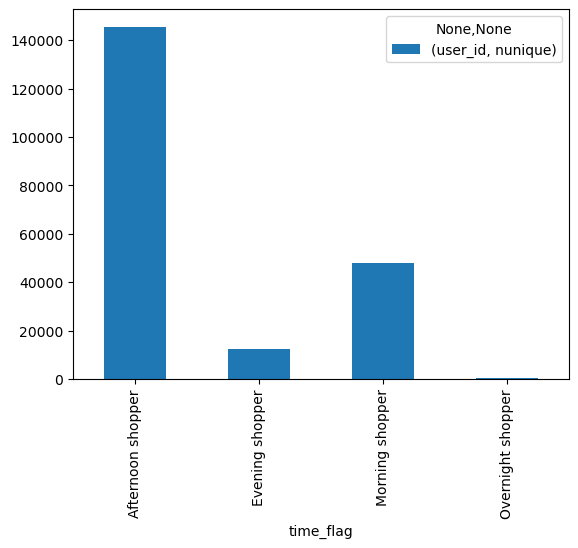

In [13]:
# create bar chart of unique user_ids per profile group
time_bar = df.groupby(['time_flag'], dropna = False).agg({'user_id': ['nunique']}).plot.bar()

b. Order day histograms

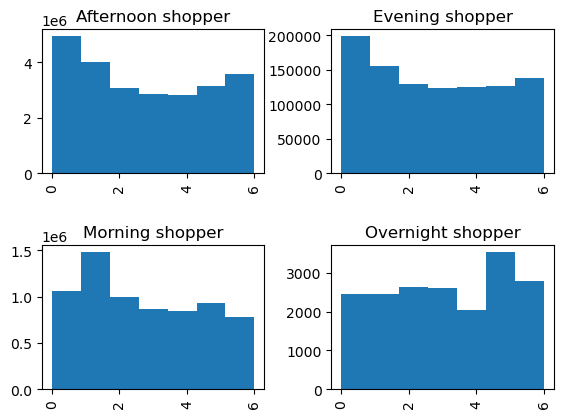

In [20]:
# create histogram of order_day_of_week frequency for each profile
demo_hist = df.hist(column='order_day_of_week', by='time_flag', bins=7)

Observations: Shoppers' favored days of week vary depending on when they tend to order. Afternoon and evening shoppers have a strong preference for Saturdays, followed by Sundays and Fridays. Morning shoppers prefer Sundays. Overnight shoppers have a strong preference for Thursdays.
Recommendations: Prioritize weekends, particularly Saturdays, for offers geared at afternoon and evening shoppers. Prioritize Sundays for offers geared at morning shoppers. Prioritize Thursdays for offers geared at overnight shoppers. 

c. Order time histograms

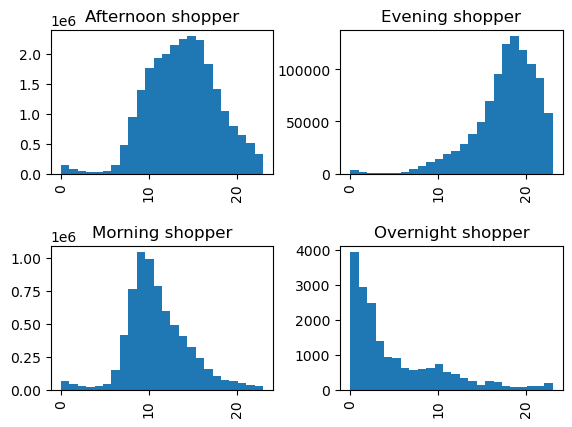

In [21]:
# create histogram displaying order_hour_of_day frequency for each profile group
demo_hist = df.hist(column='order_hour_of_day', by='time_flag', bins=24)

Observations: Predictably, shopping trips for each group are concentrated within the time of day associated with the profile. Overnight shoppers' top hours: midnight - 3 a.m.
Morning shoppers' top hours: 9 - 11 a.m.
Afternoon shoppers' top hours: noon - 3 p.m.
Evening shoppers' top hours: 5 - 7 p.m.
Recommendations: Roll out time-profile-tailored discounts and promotions before these windows to ensure they're available when customers are most likely to be browsing.

In [16]:
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_time_profiles.pkl'))